<a href="https://colab.research.google.com/github/yashvyas1405/helloworld/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis**

**Importing all the necessary**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the train dataset**

In [91]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

**Exploring the data**

In [4]:
train.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


**Checking the shape**

In [6]:
# Number of rows and columns in train dataset(with one extra target variable)
train.shape 

(38563, 9)

In [92]:
# Number of rows and columns in test dataset
test.shape

(9641, 8)

**Checking the information such as datatype, count, and null values**

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   traffic_volume       38563 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


In [29]:
train.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,281.351757,0.392733,0.000278,49.920364,3260.940409
std,13.216927,50.075055,0.009131,38.849106,1991.628329
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.858000,0.000000,0.000000,1.000000,1186.500000
50%,282.750000,0.000000,0.000000,64.000000,3378.000000
75%,291.540000,0.000000,0.000000,90.000000,4939.000000
max,308.240000,9831.300000,0.510000,100.000000,7280.000000


**Checking the null values if present**

In [8]:
train.isnull().sum()

date_time              0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

**Using pairplot method to understand the distribution of each variable with other**

A pairs plot allows us to see both distribution of single variables and relationships between two variables

# **Numerical Variable Analysis**

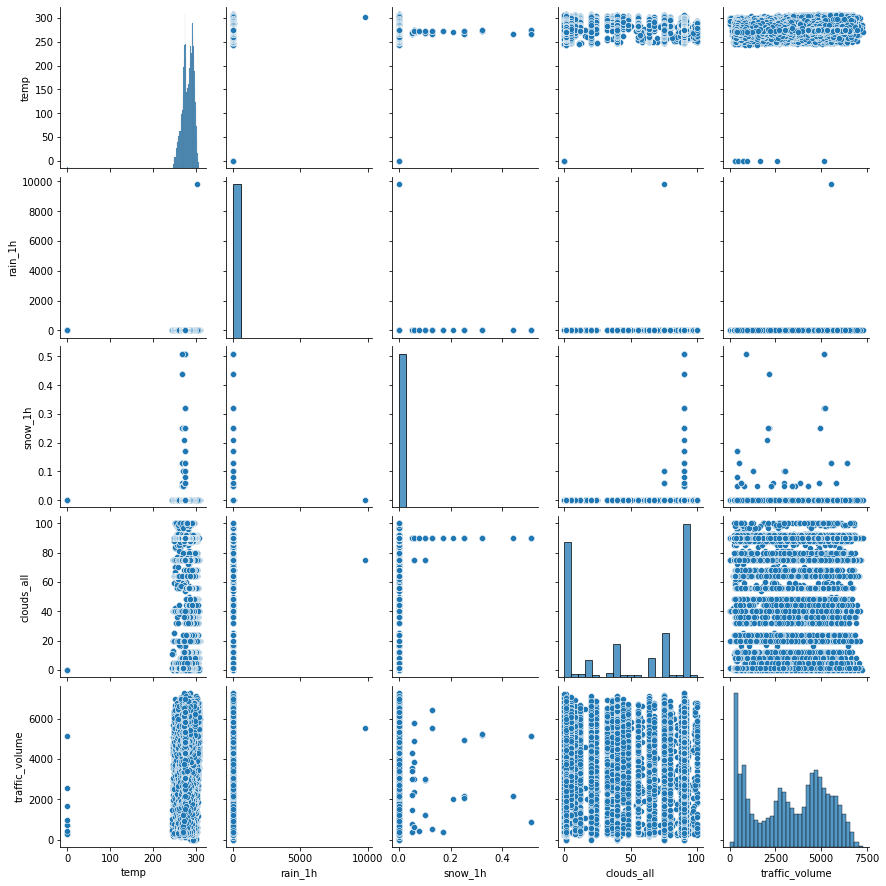

In [13]:
sns.pairplot(train)

In [31]:
num = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']

**Density Plot**

It depicts the probability density at different values in a continuous variable.

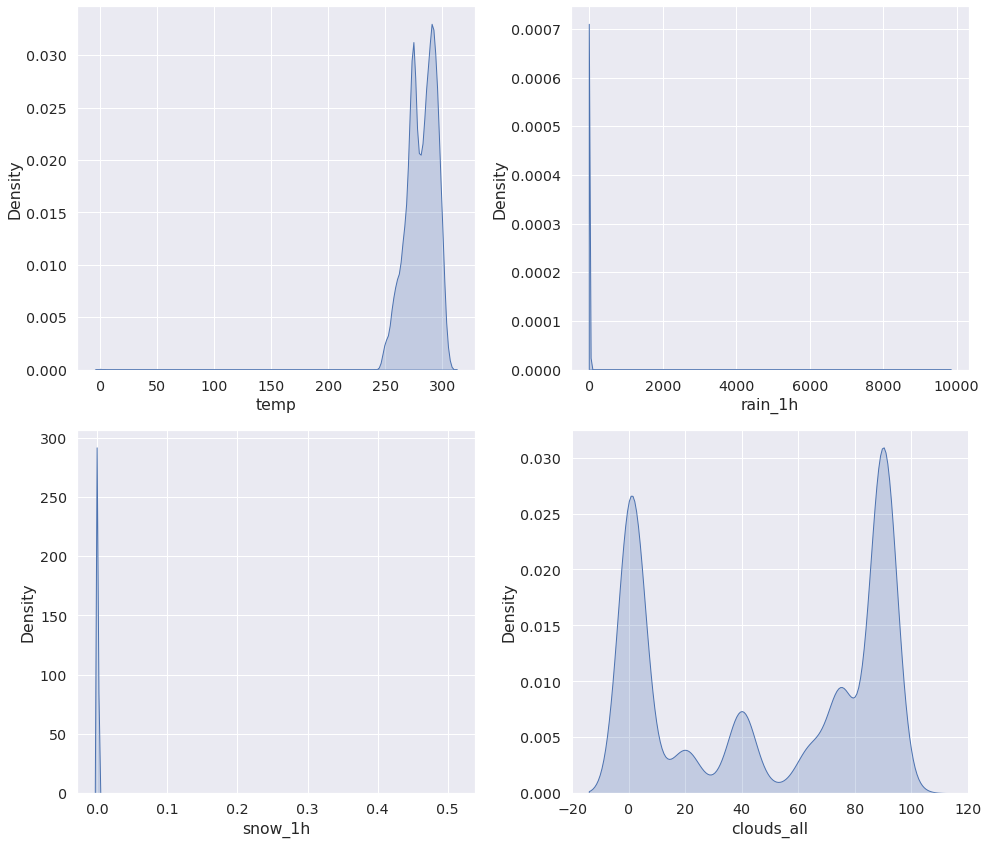

In [34]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

**Creating a correlation graph of the numerical variables to study the relationship between two variables simultaneouly.**

A coefficient close to 1 means that there’s a very strong positive correlation between the two variables. Here dark color shows very strong correlation.The diagonal line is the correlation of the variables to themselves.

If it is close to 0 then it means linear correlation is WEAK.

If it is close to 1 then it means linear correlation is STRONG.

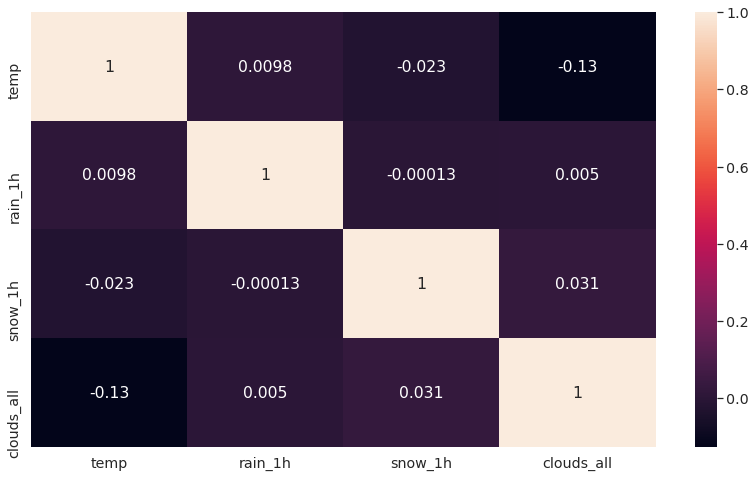

In [50]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num].corr(), annot=True)

# **Categorical Variable Analysis**


**If certain holiday increases the chances of traffic?**

Holidays actually decreases the chances of traffic.

<Figure size 1440x2880 with 0 Axes>

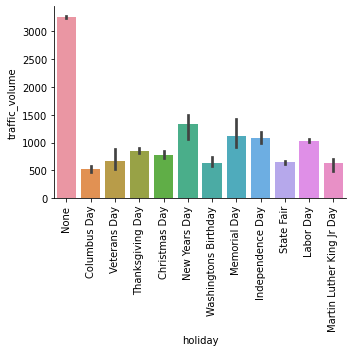

In [15]:
plt.figure(figsize=(20,40))
sns.catplot(y="traffic_volume", x="holiday",
                 data=train, kind="bar")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Does weather affects the traffic volume?**

It is seen from the graph that traffic is is least on when the weather is squall.

<Figure size 1440x720 with 0 Axes>

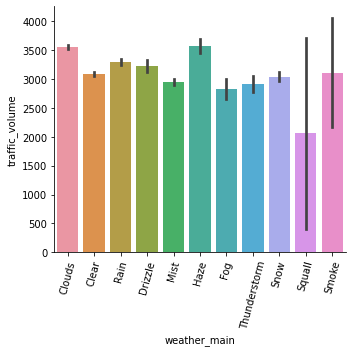

In [16]:
plt.figure(figsize=(20,10))
sns.catplot(y="traffic_volume", x="weather_main",
                 data=train, kind="bar")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

**Does weather dessciption affects traffic?**

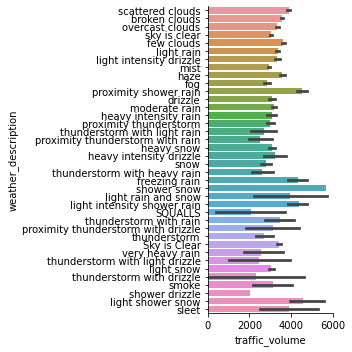

In [27]:
fig_dims =(20,10) 
sns.catplot(y="weather_description", x="traffic_volume",
                 data=train, kind="bar")
plt.tight_layout()
plt.show()

In [52]:
cat = ['holiday', 'weather_main', 'weather_description']

# **Datetime Variable**

## **Conversion of object variable to datetime variable**

In [58]:
train['date_time'] = pd.to_datetime(train['date_time'])

In [59]:
train['Year'] = train['date_time'].dt.year
train['Month'] = train['date_time'].dt.month
train['Day'] = train['date_time'].dt.day
train['Hour'] = train['date_time'].dt.hour
train['Minutes'] = train['date_time'].dt.minute
train['Seconds'] = train['date_time'].dt.second

In [60]:
# Eliminating date time
train.drop(['date_time'], axis = 1, inplace = True)

In [61]:
train.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Year,Month,Day,Hour,Minutes,Seconds
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,0,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,0,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,0,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,0,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,0,0


## **Analysis**

**Does traffic volume increases with the following year?**

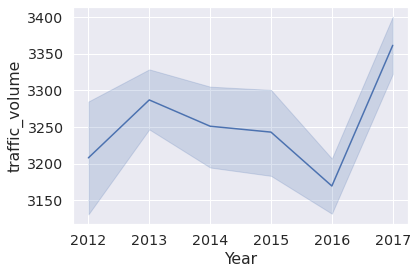

In [77]:
sns.lineplot(data=train, x="Year", y="traffic_volume")

**Traffic is high in which month?**

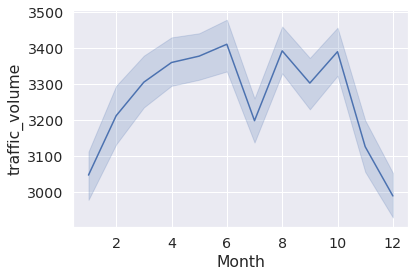

In [84]:
sns.lineplot(data=train, x="Month", y="traffic_volume")

**Traffic is high in which days?**

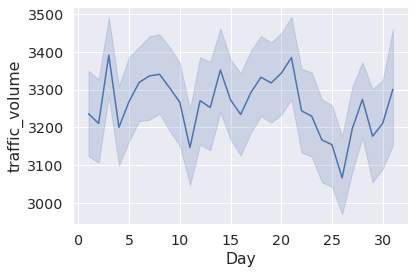

In [90]:
sns.lineplot(data=train, x="Day", y="traffic_volume")

**Is traffic high in the evening?**

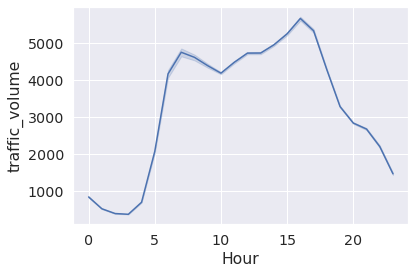

In [88]:
#Here 0 is taken as midnight
sns.lineplot(data=train, x="Hour", y="traffic_volume")

#**Note**

**After this I did few preprocessing steps and build the model using Random Forest. I further used feature selection and hyperparameter tuning (Randomized Search CV) to obtain the better efficiency of the model.**